<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/1999621658.py:32: SyntaxWarning: invalid escape sequence '\d'
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/1999621658.py:33: SyntaxWarning: invalid escape sequence '\d'
  dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].astype(str).str.extract('(\d+)')


Total number of unique restaurants: 2716
Final count of unique restaurants after remapping: 2716
Top 20 Cities by Number of Unique Restaurants (Deliveroo):
1. ANTWERPEN: 790
2. GENT: 452
3. LEUVEN: 242
4. BRUGGE: 226
5. KORTRIJK: 116
6. MECHELEN: 111
7. HASSELT: 80
8. UKKEL: 61
9. OOSTENDE: 57
10. SCHAARBEEK: 54
11. WATERLOO: 45
12. BRUSSEL: 42
13. SINT-LAMBRECHTS-WOLUWE: 37
14. ROESELARE: 36
15. JETTE: 35
16. AALST: 35
17. SINT-PIETERS-WOLUWE: 35
18. SINT-NIKLAAS: 29
19. EVERE: 26
20. GENK: 24
21. TURNHOUT: 17
22. VILVOORDE: 16
23. SINT-AGATHA-BERCHEM: 15
24. SINT-TRUIDEN: 14
25. KRAAINEM: 13
26. VORST: 13
27. SINT-JANS-MOLENBEEK: 11
28. DENDERMONDE: 11
29. GANSHOREN: 9
30. MORTSEL: 8
31. OUDERGEM: 6
32. GRIMBERGEN: 6
33. DROGENBOS: 5
34. WIJNEGEM: 4
35. WEMMEL: 4
36. ZAVENTEM: 3
37. SCHOTEN: 3
38. SINT-PIETERS-LEEUW: 3
39. MACHELEN: 3
40. WEZEMBEEK-OPPEM: 2
41. KNOKKE-HEIST: 2
42. DILBEEK: 2
43. DESTELBERGEN: 1
44. WOMMELGEM: 1
45. BIERBEEK: 1
46. BORSBEEK: 1
47. OUD-TURNHOUT: 1
48. 

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/1999621658.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')


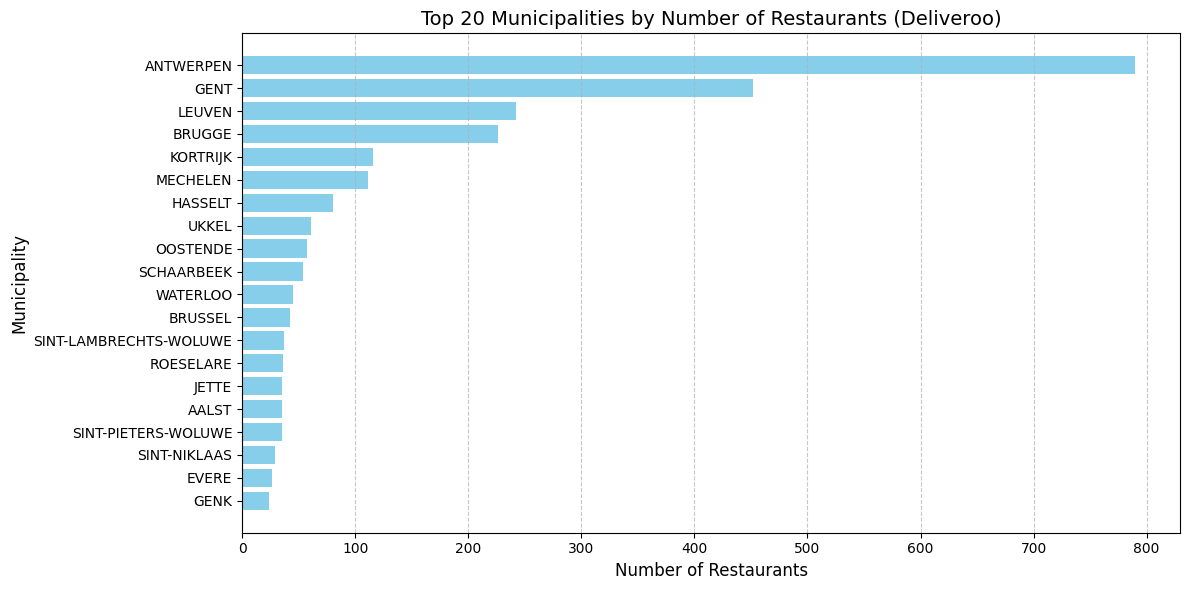

In [68]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/deliveroo.db"
dutch_postal_codes_file = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls"

# Count unique restaurants from the database
conn = sqlite3.connect(db_path)
restaurant_count_query = """
    SELECT 
        r.id AS restaurant_id,
        r.postal_code AS postal_code,
        l.name AS location_name
    FROM restaurants AS r
    LEFT JOIN locations_to_restaurants AS lr ON r.id = lr.restaurant_id
    LEFT JOIN locations AS l ON lr.location_id = l.id;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)
conn.close()

# Remove duplicates to get the accurate count
unique_restaurants = restaurant_data.drop_duplicates(subset=['restaurant_id'])
total_restaurants = len(unique_restaurants)
print(f"Total number of unique restaurants: {total_restaurants}")

# Load the Dutch postal codes dataset
dutch_postal_codes_df = pd.read_excel(dutch_postal_codes_file)

# Normalize and clean postal codes
unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].astype(str).str.extract('(\d+)')

# Remap missing or '0' locations using the postal code from the external CSV
remapped_restaurants_df = pd.merge(
    unique_restaurants,
    dutch_postal_codes_df[['Postcode', 'MAIN MUNICIPALITY']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
)

# Deduplicate to ensure unique restaurant IDs
remapped_restaurants_df = remapped_restaurants_df.drop_duplicates(subset=['restaurant_id'])

# Replace missing or '0' location names with the MAIN MUNICIPALITY from postal codes
remapped_restaurants_df['location_name'] = remapped_restaurants_df['location_name'].fillna(remapped_restaurants_df['MAIN MUNICIPALITY'])
remapped_restaurants_df.drop(columns=['Postcode'], inplace=True)

# Final count of unique restaurants
final_restaurant_count = len(remapped_restaurants_df)
print(f"Final count of unique restaurants after remapping: {final_restaurant_count}")

# Group by municipality and count restaurants
restaurants_per_municipality = remapped_restaurants_df.groupby('MAIN MUNICIPALITY')['restaurant_id'].count().reset_index()
restaurants_per_municipality.columns = ['Municipality', 'Restaurant Count']
restaurants_per_municipality = restaurants_per_municipality.sort_values(by='Restaurant Count', ascending=False)

# Display top 20 municipalities by restaurant count
print("Top 20 Cities by Number of Unique Restaurants (Deliveroo):")
for idx, (municipality, count) in enumerate(zip(restaurants_per_municipality['Municipality'], restaurants_per_municipality['Restaurant Count']), start=1):
    print(f"{idx}. {municipality}: {count}")

top_20_municipalities = restaurants_per_municipality.head(20)

# Plot the top 20 municipalities
plt.figure(figsize=(12, 6))
plt.barh(top_20_municipalities['Municipality'], top_20_municipalities['Restaurant Count'], color='skyblue')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 20 Municipalities by Number of Restaurants (Deliveroo)', fontsize=14)
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_4250/3312756622.py:32: SyntaxWarning: invalid escape sequence '\d'
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_4250/3312756622.py:33: SyntaxWarning: invalid escape sequence '\d'
  dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].astype(str).str.extract('(\d+)')


Total number of unique restaurants: 2716
Final count of unique restaurants after remapping: 2716
Top 20 Municipalities by Number of Unique Restaurants (Deliveroo):
1. ANTWERPEN: 790
2. GENT: 452
3. LEUVEN: 242
4. BRUGGE: 226
5. KORTRIJK: 116
6. MECHELEN: 111
7. HASSELT: 80
8. UKKEL: 61
9. OOSTENDE: 57
10. SCHAARBEEK: 54
11. WATERLOO: 45
12. BRUSSEL: 42
13. SINT-LAMBRECHTS-WOLUWE: 37
14. ROESELARE: 36
15. JETTE: 35
16. AALST: 35
17. SINT-PIETERS-WOLUWE: 35
18. SINT-NIKLAAS: 29
19. EVERE: 26
20. GENK: 24


/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_4250/3312756622.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')


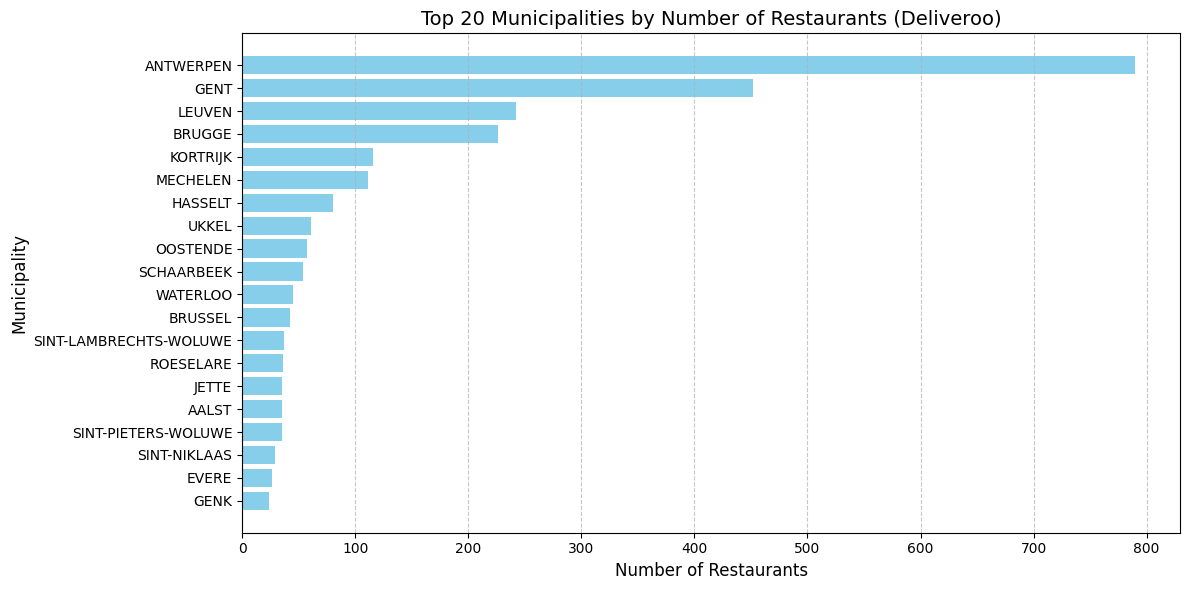

In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/deliveroo.db"
dutch_postal_codes_file = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls"

# Count unique restaurants from the database
conn = sqlite3.connect(db_path)
restaurant_count_query = """
    SELECT 
        r.id AS restaurant_id,
        r.postal_code AS postal_code,
        l.name AS location_name
    FROM restaurants AS r
    LEFT JOIN locations_to_restaurants AS lr ON r.id = lr.restaurant_id
    LEFT JOIN locations AS l ON lr.location_id = l.id;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)
conn.close()

# Remove duplicates to get the accurate count
unique_restaurants = restaurant_data.drop_duplicates(subset=['restaurant_id'])
total_restaurants = len(unique_restaurants)
print(f"Total number of unique restaurants: {total_restaurants}")

# Load the Dutch postal codes dataset
dutch_postal_codes_df = pd.read_excel(dutch_postal_codes_file)

# Normalize and clean postal codes
unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract('(\d+)')
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].astype(str).str.extract('(\d+)')

# Remap missing or '0' locations using the external CSV
remapped_restaurants_df = pd.merge(
    unique_restaurants,
    dutch_postal_codes_df[['Postcode', 'NAME', 'MAIN MUNICIPALITY']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
)

# Deduplicate to ensure unique restaurant IDs
remapped_restaurants_df = remapped_restaurants_df.drop_duplicates(subset=['restaurant_id'])

# Replace missing or '0' location names
remapped_restaurants_df['location_name'] = remapped_restaurants_df['location_name'].fillna(remapped_restaurants_df['NAME'])
remapped_restaurants_df.drop(columns=['Postcode', 'NAME'], inplace=True)

# Final count of unique restaurants
final_restaurant_count = len(remapped_restaurants_df)
print(f"Final count of unique restaurants after remapping: {final_restaurant_count}")

# Group by municipality and count restaurants
restaurants_per_municipality = remapped_restaurants_df.groupby('MAIN MUNICIPALITY')['restaurant_id'].count().reset_index()
restaurants_per_municipality.columns = ['Municipality', 'Restaurant Count']
restaurants_per_municipality = restaurants_per_municipality.sort_values(by='Restaurant Count', ascending=False)

# Print the top 20 municipalities
print("Top 20 Municipalities by Number of Unique Restaurants (Deliveroo):")
for idx, (location, count) in enumerate(zip(restaurants_per_municipality.head(20)['Municipality'], 
                                             restaurants_per_municipality.head(20)['Restaurant Count']), start=1):
    print(f"{idx}. {location}: {count}")

# Plot the top 20 municipalities
top_20_municipalities = restaurants_per_municipality.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_municipalities['Municipality'], top_20_municipalities['Restaurant Count'], color='skyblue')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 20 Municipalities by Number of Restaurants (Deliveroo)', fontsize=14)
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


Top 20 Cities by Number of Unique Restaurants (Takeaway):
1. Antwerpen: 437
2. Gent: 309
3. Bruxelles: 264
4. Leuven: 174
5. Schaerbeek: 110
6. Brugge: 96
7. Oostende: 85
8. Mechelen: 84
9. Anderlecht: 84
10. Deurne: 56
11. Uccle: 51
12. Ixelles: 50
13. Laeken: 48
14. Etterbeek: 43
15. Hasselt: 41
16. Sint-Niklaas: 39
17. Aalst: 38
18. Molenbeek-Saint-Jean: 36
19. Genk: 32
20. Jette: 30


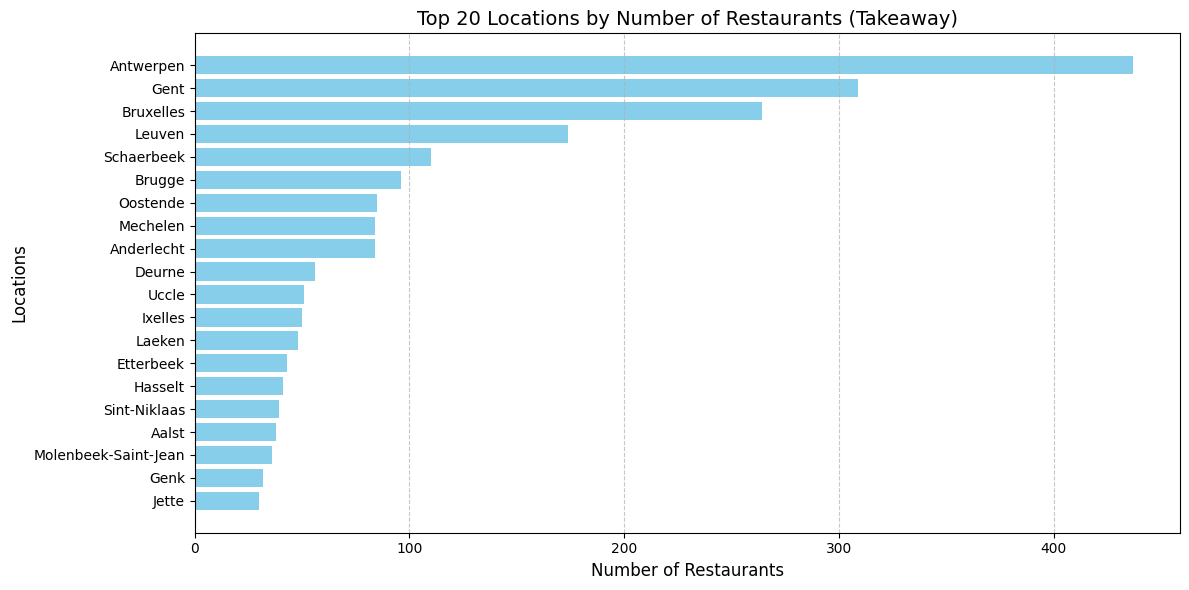

In [50]:
import matplotlib.pyplot as plt
import sqlite3

# Connect Takeaway database
con = sqlite3.connect('/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db')

# SQL query top 20 cities by restaurants
takeaway_restaurant_distribution = """
    SELECT 
    r.city AS city,
    COUNT(DISTINCT r.restaurant_id) AS restaurant_count
    FROM restaurants AS r
    GROUP BY r.city
    ORDER BY restaurant_count DESC
    LIMIT 20;
"""

# Execute the query
takeaway__restaurant_cursor = con.execute(takeaway_restaurant_distribution)
t_distribution_results = takeaway__restaurant_cursor.fetchall()

# Print the results
print("Top 20 Cities by Number of Unique Restaurants (Takeaway):")
for idx, (location, count) in enumerate(t_distribution_results, start=1):
    print(f"{idx}. {location}: {count}")

# Preprocess data for the chart
locations = [row[0] for row in t_distribution_results]  # City names
restaurant_counts = [row[1] for row in t_distribution_results]  # Restaurant counts

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(locations, restaurant_counts, color='skyblue')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Locations', fontsize=12)
plt.title('Top 20 Locations by Number of Restaurants (Takeaway)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


[('Antwerpen', 393), ('Antwerp', 307), ('Gent', 198), ('Leuven', 193), ('Ghent', 144), ('Brussels', 115), ('Bruxelles', 91), ('Mechelen', 68), ('Aalst', 61), ('Anderlecht', 59), ('Bruges', 54), ('Brugge', 47), ('Kortrijk', 45), ('Waterloo', 43), ('Sint-Niklaas', 43), ('Hasselt', 41), ('Oostende', 28), ('Zaventem', 27), ('Evere', 27), ('Jette', 26)]


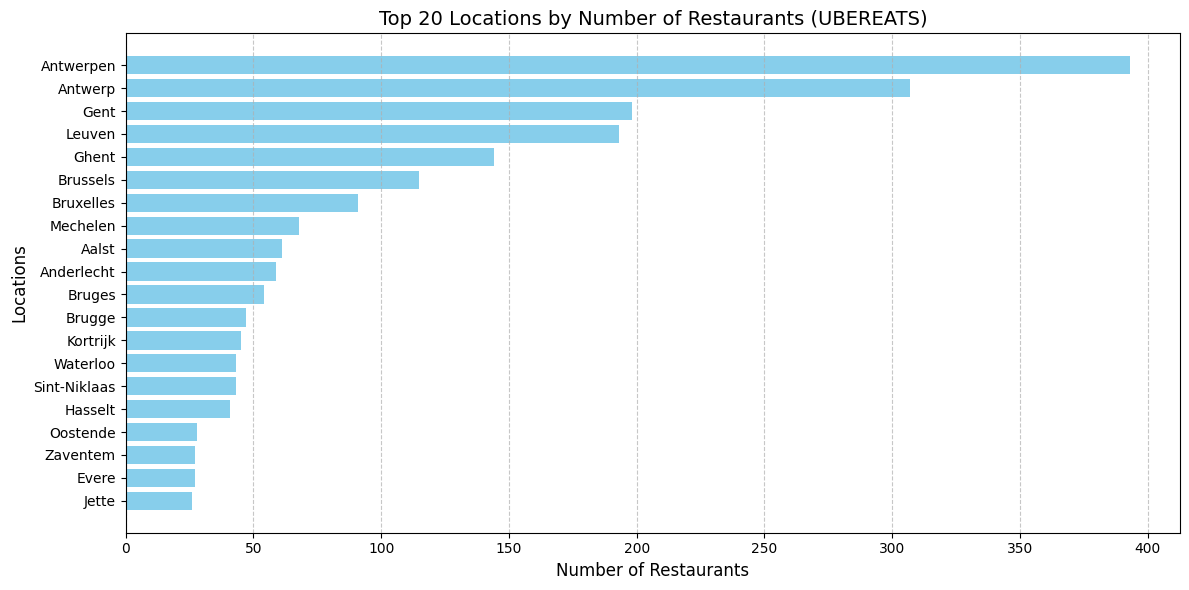

In [ ]:
con = sqlite3.connect('/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/ubereats.db')  

uber_restaurant_distribution = """
    SELECT 
     r.location__city AS city,
    COUNT(*) AS restaurant_count
    FROM restaurants AS r
    GROUP BY  r.location__city
    ORDER BY restaurant_count DESC
    LIMIT 20;"""

uber__restaurant_cursor = con.execute(uber_restaurant_distribution)
u_distribution_results = uber__restaurant_cursor.fetchall()
print(u_distribution_results)

#preprocess data to chart
locations = [row[0] for row in u_distribution_results]  
restaurant_counts = [row[1] for row in u_distribution_results]  

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(locations, restaurant_counts, color='skyblue')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Locations', fontsize=12)
plt.title('Top 20 Locations by Number of Restaurants (UBEREATS)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()



Rows with missing city values:
     city                         restaurant_id  \
435        b4f0e280-51c0-5a4c-aec1-72ae20ab81eb   
476        00ec3913-3a38-4b4b-b025-faaaa24a45c1   
926        ec3f1b8d-2998-5aab-81fe-2afbfd0549d6   
1570       db3071d0-f7ac-4ca5-9e06-a6be04b00ec0   
1672       e2505de4-c708-4652-b009-048773c7bd72   
1975       e2834ec8-f4a3-4a7f-9c95-8564a859c38d   
2386       a473f47e-ca45-5e4c-b968-790ee038593b   
2540       e1897b35-37e9-41d7-bf7e-e79c102b32ff   

                                                address postal_code  
435        Diestsesteenweg 215, Kermt, Limburg, 3540 ,         None  
476   Vital Decosterstraat 16, Leuven, Flemish Regio...        None  
926      Autoroute E40 - Brussel, Dilbeek, Emea, 1702,         None  
1570                       Sint-Jobsesteenweg 759, 1180        None  
1672                                 Houtbriel 25, 9100        None  
1975                Bonnefantenstraat 8, 3500 Hasselt,         None  
2386               

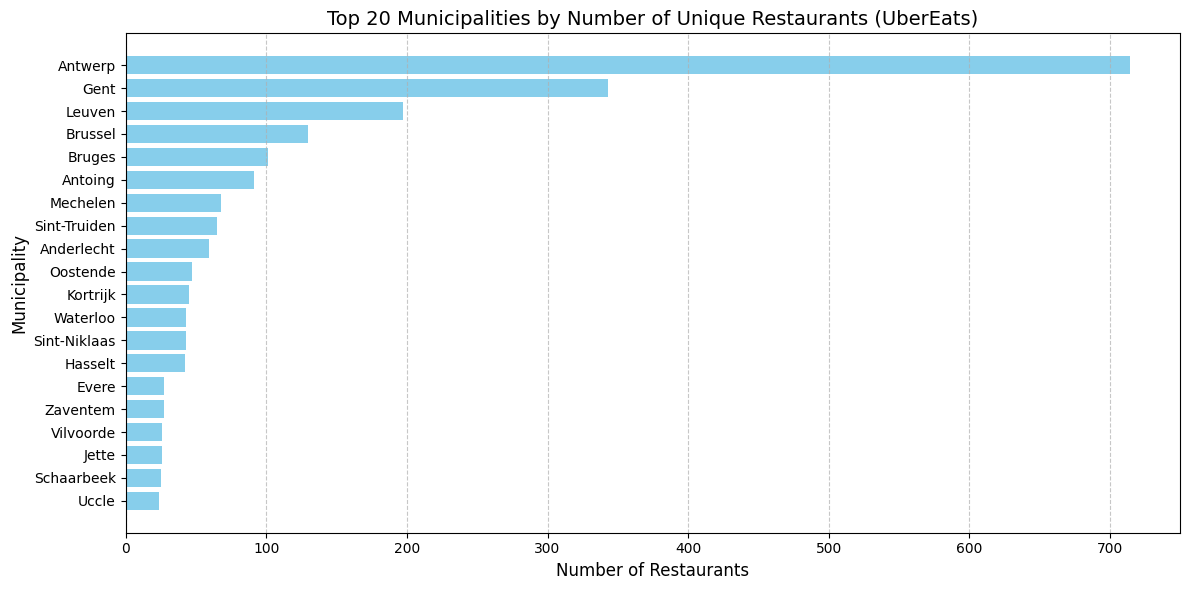

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

# File paths
db_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/ubereats.db'
csv_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls'

# Connect to the UberEats database
conn = sqlite3.connect(db_path)

# Count total restaurants directly from the database
total_restaurants_query = """
    SELECT COUNT(DISTINCT id) AS total_restaurants
    FROM restaurants;
"""
total_restaurants_sql = pd.read_sql_query(total_restaurants_query, conn).iloc[0, 0]

# Query to extract relevant data
uber_restaurant_query = """
    SELECT 
        location__city AS city,
        id AS restaurant_id,
        location__address AS address,
        location__postal_code AS postal_code
    FROM restaurants;
"""
uber_restaurant_data = pd.read_sql_query(uber_restaurant_query, conn)

# Close the connection
conn.close()

# Load the external CSV with municipalities
municipality_data = pd.read_excel(csv_path)

# Fix missing data
missing_city_data = uber_restaurant_data[uber_restaurant_data['city'].isnull() | (uber_restaurant_data['city'].str.strip() == '')]
print("Rows with missing city values:")
print(missing_city_data)

# Correct specific missing city values based on the provided mapping
manual_city_corrections = {
    435: 'Limburg',    # Diestsesteenweg 215, Kermt, Limburg, 3540
    476: 'Leuven',     # Vital Decosterstraat 16, Leuven, Flemish Region
    926: 'Brussels',   # Autoroute E40 - Brussel, Dilbeek, Emea, 1702
    1570: 'Sint-Jobsesteenweg',        # Sint-Jobsesteenweg 759, 1180 (Unknown)
    1672: 'Houtbriel', # Houtbriel 25, 9100
    1975: 'Hasselt',   # Bonnefantenstraat 8, 3500 Hasselt
    2386: 'Antwerp',   # Panamarenkoplein 3, 2000 Antwerpen
    2540: 'Antwerp'    # Leysstraat 62, 2000 Antwerp
}

# Apply the corrections
for idx, city in manual_city_corrections.items():
    uber_restaurant_data.loc[idx, 'city'] = city

# Normalize and clean the columns for matching
uber_restaurant_data['city'] = uber_restaurant_data['city'].str.strip().str.lower()
municipality_data['NAME'] = municipality_data['NAME'].str.strip().str.lower()
municipality_data['MAIN MUNICIPALITY'] = municipality_data['MAIN MUNICIPALITY'].str.strip().str.lower()

# Create a mapping function using rapidfuzz
def map_city_to_municipality(city, municipality_names):
    if pd.isna(city):
        return None
    result = process.extractOne(city, municipality_names, scorer=fuzz.ratio)
    if result is not None:
        match, score, _ = result
        if score >= 80:  # Use 80% similarity as a threshold
            return match
    return None

municipality_names = municipality_data['NAME'].unique()
uber_restaurant_data['mapped_municipality'] = uber_restaurant_data['city'].apply(
    map_city_to_municipality, args=(municipality_names,)
)

# Join the matched municipalities with the main municipality column
uber_restaurant_data = pd.merge(
    uber_restaurant_data,
    municipality_data[['NAME', 'MAIN MUNICIPALITY']],
    left_on='mapped_municipality',
    right_on='NAME',
    how='left'
)

# Replace missing mapped municipalities with the original city values
uber_restaurant_data['final_municipality'] = uber_restaurant_data['MAIN MUNICIPALITY'].fillna(uber_restaurant_data['city'])

# Normalize naming
city_mapping = {
    'antwerpen': 'antwerp',
    'antwerp': 'antwerp',
    'gent': 'gent',
    'ghent': 'gent',
    'bruxelles': 'brussels',
    'brussels': 'brussels',
    'brugge': 'bruges',
    'bruges': 'bruges',
    'louvain': 'leuven',
    'leuven': 'leuven',
    'uccle': 'uccle',
    'ukkle': 'uccle',
    'uccle / ukkel': 'uccle',
    'Knocke-Heist': 'Knokke-Heist'
}
uber_restaurant_data['final_municipality'] = uber_restaurant_data['final_municipality'].replace(city_mapping)

# Remove duplicates based on restaurant_id
uber_restaurant_data = uber_restaurant_data.drop_duplicates(subset=['restaurant_id'])

# Count total unique restaurants after processing
total_restaurants_processed = uber_restaurant_data['restaurant_id'].nunique()

# Print comparison
print(f"Total restaurants in SQL database: {total_restaurants_sql}")
print(f"Total restaurants in processed data: {total_restaurants_processed}")
if total_restaurants_sql == total_restaurants_processed:
    print("Counts match! Analysis is consistent with the database.")
else:
    print("Counts do NOT match! Review the processing steps for potential issues.")

# Group by final municipality and count unique restaurants
restaurants_per_municipality = (
    uber_restaurant_data.groupby('final_municipality')['restaurant_id']
    .count()
    .reset_index()
    .rename(columns={'restaurant_id': 'Restaurant Count'})
    .sort_values(by='Restaurant Count', ascending=False)
)

# Print the top 20 municipalities for analysis
print("Top 20 Municipalities by Number of Unique Restaurants (UberEats):")
for idx, (municipality, count) in enumerate(
    zip(restaurants_per_municipality['final_municipality'], restaurants_per_municipality['Restaurant Count']), start=1
):
    print(f"{idx}. {municipality.title()}: {count}")

# Plot the top 20 municipalities
top_20_municipalities = restaurants_per_municipality.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_municipalities['final_municipality'].str.title(), top_20_municipalities['Restaurant Count'], color='skyblue')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 20 Municipalities by Number of Unique Restaurants (UberEats)', fontsize=14)
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


In [56]:
%pip install matplotlib_venn


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45347 sha256=7ee00aeae17263961da6b7f413580f626c82778efdb05e4d24a1a6d255f30381
  Stored in directory: /Users/irisvirus/Library/Caches/pip/wheels/8a/29/52/4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


Total number of unique restaurants: 2716
Final count of unique restaurants after remapping: 2716
Top Municipalities with Vegetarian Data:
              Municipality  Restaurant Count  Veg Restaurant Count  \
1                ANTWERPEN               790                   135   
14                    GENT               452                   100   
23                  LEUVEN               242                    45   
4                   BRUGGE               226                    46   
21                KORTRIJK               116                    19   
26                MECHELEN               111                    18   
16                 HASSELT                80                    12   
45                   UKKEL                61                     5   
28                OOSTENDE                57                    13   
33              SCHAARBEEK                54                     3   
48                WATERLOO                45                     5   
5                  BRU

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/3024738919.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract(r'(\d+)')


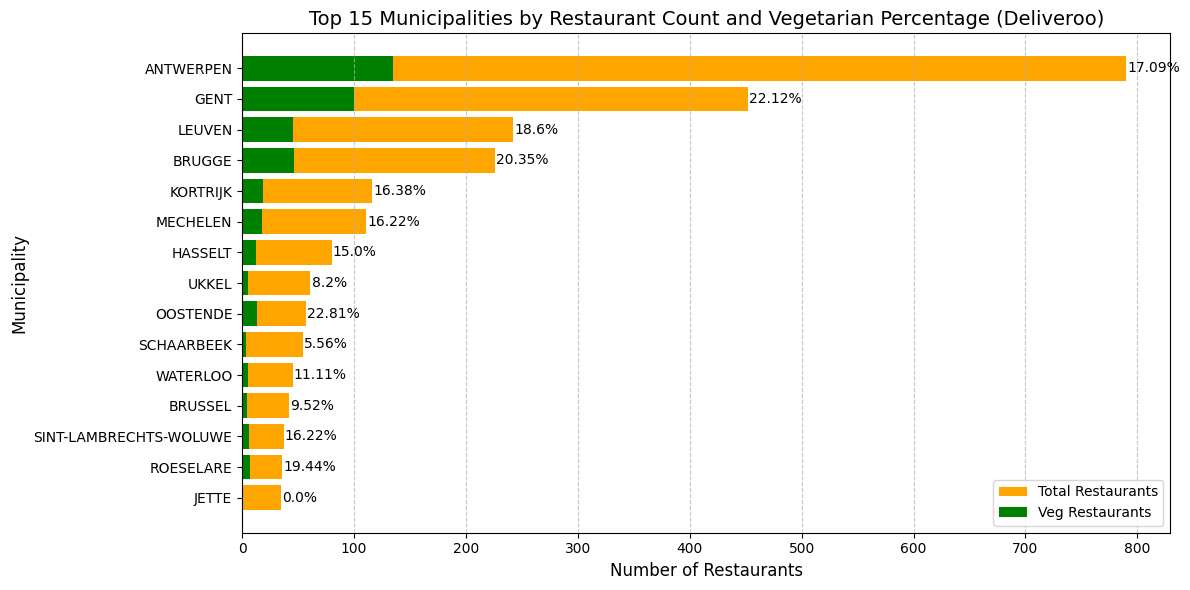

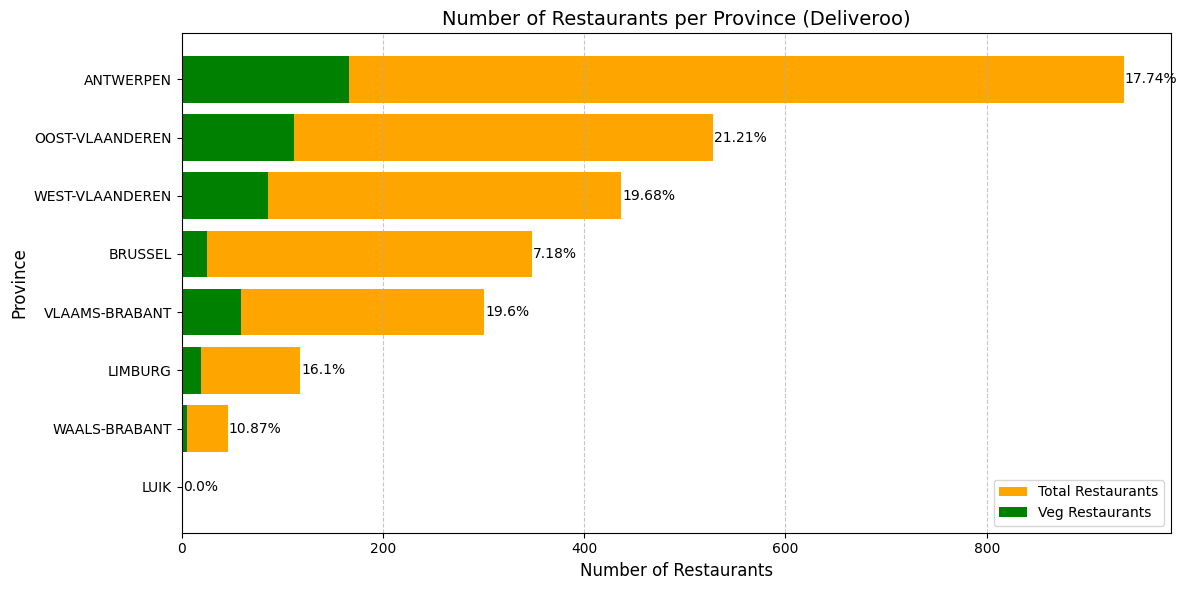

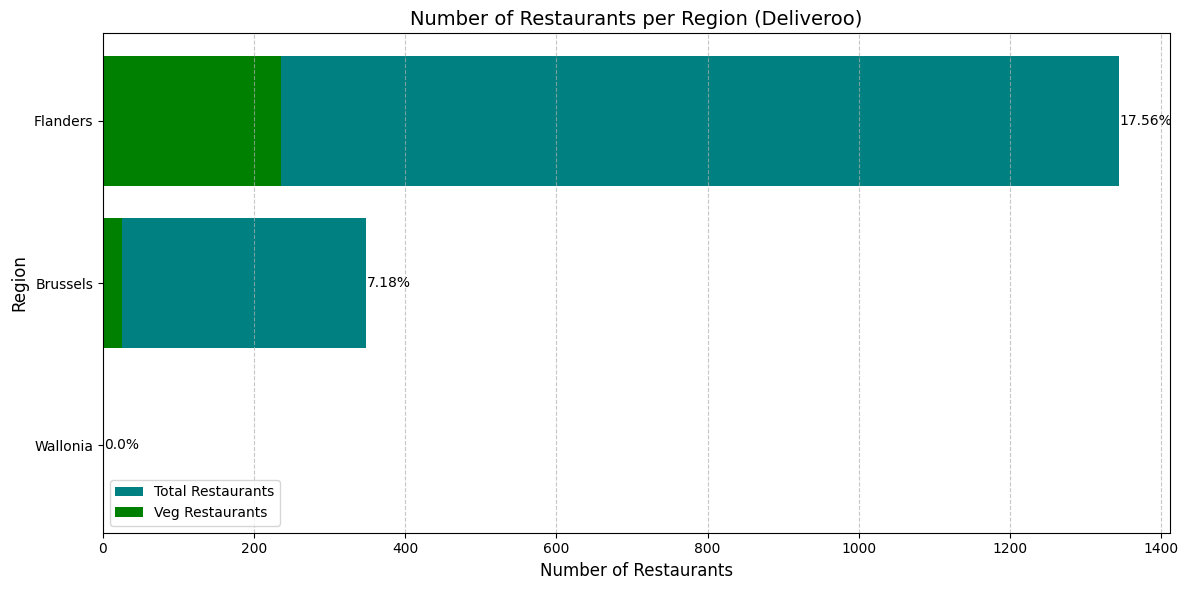

KeyError: "['location_name'] not in index"

In [67]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/deliveroo.db"
dutch_postal_codes_file = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls"

# Count unique restaurants from the database
conn = sqlite3.connect(db_path)
restaurant_count_query = """
    SELECT 
        r.id AS restaurant_id,
        r.postal_code AS postal_code,
        l.name AS location_name
    FROM restaurants AS r
    LEFT JOIN locations_to_restaurants AS lr ON r.id = lr.restaurant_id
    LEFT JOIN locations AS l ON lr.location_id = l.id;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Query to extract vegetarian and vegan dishes with postal codes from the restaurant table for Deliveroo
veg_dish_query = """
SELECT
    r.id AS restaurant_id,
    r.postal_code AS postal_code,
    r.name AS restaurant_name,
    r.address AS restaurant_address,
    mi.name AS dish_name,
    mi.description,
    c.name AS category
FROM
    menu_items mi
JOIN
    categories c ON mi.categorie_id = c.categorie_id
JOIN
    restaurants r ON mi.restaurant_id = r.id
WHERE
    c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%';
"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)
conn.close()

# Remove duplicates to get the accurate count
unique_restaurants = restaurant_data.drop_duplicates(subset=['restaurant_id'])
total_restaurants = len(unique_restaurants)
print(f"Total number of unique restaurants: {total_restaurants}")

# Load the Dutch postal codes dataset
dutch_postal_codes_df = pd.read_excel(dutch_postal_codes_file)

# Normalize and clean postal codes
unique_restaurants['postal_code'] = unique_restaurants['postal_code'].astype(str).str.extract(r'(\d+)')
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].astype(str).str.extract(r'(\d+)')
veg_dish_data['postal_code'] = veg_dish_data['postal_code'].astype(str).str.extract(r'(\d+)')

# Remap missing or '0' locations using the external CSV
remapped_restaurants_df = pd.merge(
    unique_restaurants,
    dutch_postal_codes_df[['Postcode', 'NAME', 'MAIN MUNICIPALITY', 'Provincie']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
)

# Deduplicate to ensure unique restaurant IDs
remapped_restaurants_df = remapped_restaurants_df.drop_duplicates(subset=['restaurant_id'])

# Replace missing or '0' location names
remapped_restaurants_df['location_name'] = remapped_restaurants_df['location_name'].fillna(remapped_restaurants_df['NAME'])
remapped_restaurants_df.drop(columns=['Postcode', 'NAME'], inplace=True)

# Final count of unique restaurants
final_restaurant_count = len(remapped_restaurants_df)
print(f"Final count of unique restaurants after remapping: {final_restaurant_count}")

# Group by municipality and count restaurants
restaurants_per_municipality = remapped_restaurants_df.groupby('MAIN MUNICIPALITY')['restaurant_id'].count().reset_index()
restaurants_per_municipality.columns = ['Municipality', 'Restaurant Count']

# Map vegetarian and vegan dishes to municipalities
veg_dishes_per_municipality = pd.merge(
    veg_dish_data,
    dutch_postal_codes_df[['Postcode', 'MAIN MUNICIPALITY']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
).groupby('MAIN MUNICIPALITY')['restaurant_id'].nunique().reset_index()
veg_dishes_per_municipality.columns = ['Municipality', 'Veg Restaurant Count']

# Combine municipality restaurant and vegetarian data
municipality_comparison_df = pd.merge(
    restaurants_per_municipality,
    veg_dishes_per_municipality,
    on='Municipality',
    how='left'
)
municipality_comparison_df['Veg Restaurant Count'] = municipality_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
municipality_comparison_df['Percentage Veg'] = (municipality_comparison_df['Veg Restaurant Count'] / municipality_comparison_df['Restaurant Count'] * 100).round(2)
municipality_comparison_df = municipality_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Print top municipalities with data
print("Top Municipalities with Vegetarian Data:")
print(municipality_comparison_df.head(15))

# Plot bar chart for top 15 municipalities
top_15_municipalities = municipality_comparison_df.head(15)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Restaurant Count'], color='orange', label='Total Restaurants')
plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for bar, percentage in zip(bars, top_15_municipalities['Percentage Veg']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}%', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 15 Municipalities by Restaurant Count and Vegetarian Percentage (Deliveroo)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by province and count restaurants
restaurants_per_province = remapped_restaurants_df.groupby('Provincie')['restaurant_id'].count().reset_index()
restaurants_per_province.columns = ['Province', 'Restaurant Count']

# Map vegetarian and vegan dishes to provinces
veg_dishes_per_province = pd.merge(
    veg_dish_data,
    dutch_postal_codes_df[['Postcode', 'Provincie']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
).groupby('Provincie')['restaurant_id'].nunique().reset_index()
veg_dishes_per_province.columns = ['Province', 'Veg Restaurant Count']

# Combine province restaurant and vegetarian data
province_comparison_df = pd.merge(
    restaurants_per_province,
    veg_dishes_per_province,
    on='Province',
    how='left'
)
province_comparison_df['Veg Restaurant Count'] = province_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
province_comparison_df['Percentage Veg'] = (province_comparison_df['Veg Restaurant Count'] / province_comparison_df['Restaurant Count'] * 100).round(2)
province_comparison_df = province_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Plot bar chart for restaurants per province with vegetarian data
plt.figure(figsize=(12, 6))
bars = plt.barh(province_comparison_df['Province'], province_comparison_df['Restaurant Count'], color='orange', label='Total Restaurants')
plt.barh(province_comparison_df['Province'], province_comparison_df['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for bar, percentage in zip(bars, province_comparison_df['Percentage Veg']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}%', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.title('Number of Restaurants per Province (Deliveroo)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add regions based on postal codes (Flanders, Brussels, Wallonia)
def assign_region(postal_code):
    if pd.notnull(postal_code):
        postal_code = int(postal_code)
        if 1000 <= postal_code <= 1299:
            return 'Brussels'
        elif 1300 <= postal_code <= 1499 or 2000 <= postal_code <= 3999:
            return 'Flanders'
        elif 4000 <= postal_code <= 7999:
            return 'Wallonia'
    return None

remapped_restaurants_df['Region'] = remapped_restaurants_df['postal_code'].apply(assign_region)

# Group by region and count restaurants
restaurants_per_region = remapped_restaurants_df.groupby('Region')['restaurant_id'].count().reset_index()
restaurants_per_region.columns = ['Region', 'Restaurant Count']

# Map vegetarian and vegan dishes to regions
veg_dishes_per_region = pd.merge(
    veg_dish_data,
    remapped_restaurants_df[['postal_code', 'Region']],
    on='postal_code',
    how='left'
).groupby('Region')['restaurant_id'].nunique().reset_index()
veg_dishes_per_region.columns = ['Region', 'Veg Restaurant Count']

# Combine region restaurant and vegetarian data
region_comparison_df = pd.merge(
    restaurants_per_region,
    veg_dishes_per_region,
    on='Region',
    how='left'
)
region_comparison_df['Veg Restaurant Count'] = region_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
region_comparison_df['Percentage Veg'] = (region_comparison_df['Veg Restaurant Count'] / region_comparison_df['Restaurant Count'] * 100).round(2)
region_comparison_df = region_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Plot bar chart for restaurants per region with vegetarian data
plt.figure(figsize=(12, 6))
bars = plt.barh(region_comparison_df['Region'], region_comparison_df['Restaurant Count'], color='teal', label='Total Restaurants')
plt.barh(region_comparison_df['Region'], region_comparison_df['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for bar, percentage in zip(bars, region_comparison_df['Percentage Veg']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}%', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Number of Restaurants per Region (Deliveroo)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Export vegetarian data to CSV
veg_dish_data_export = veg_dish_mapped[['restaurant_id', 'postal_code', 'restaurant_name', 'restaurant_address', 'dish_name', 'category', 'MAIN MUNICIPALITY']]
veg_dish_data_export.to_csv("veg_dishes_with_restaurants_and_municipality.csv", index=False)
print("Vegetarian dish data with restaurant details and municipality exported to 'veg_dishes_with_restaurants_and_municipality.csv'.")

Restaurant Duplicate Files :                             slug_id restaurant_id  postal_code  \
5       pizza-hut-delivery-houthalen      0307RP11         3530   
6       pizza-hut-delivery-houthalen      0307RP11         3530   
7       pizza-hut-delivery-houthalen      0307RP11         3530   
8       pizza-hut-delivery-houthalen      0307RP11         3530   
9       pizza-hut-delivery-houthalen      0307RP11         3530   
...                              ...           ...          ...   
157804                         titis      RR3Q15QN         1750   
157805                         titis      RR3Q15QN         1674   
157806                         titis      RR3Q15QN         1500   
157807                         titis      RR3Q15QN         1755   
157808                         titis      RR3Q15QN         9400   

                 location_name  
5           Sint-Lambertuskerk  
6            Sint-Martinuskerk  
7       Sint-Jozef Werkmankerk  
8               Sint-Trudokerk  
9 

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/368968588.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_9418/368968588.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_restaurants['postal_code'] = unique_restaurants['postal_code'].str.extract(r'(\d+)', expand=False)


Final count of unique restaurants after remapping: 4071
Top Municipalities with Vegetarian Data:
           Municipality  Restaurant Count  Veg Restaurant Count  \
5             ANTWERPEN               562                   138   
52                 GENT               338                    92   
46                EVERE               250                    24   
39              DILBEEK               202                     8   
175           VILVOORDE               177                    12   
190            ZAVENTEM               108                    18   
118            MECHELEN               106                    22   
112             LUBBEEK                77                    18   
26              BREDENE                74                    16   
28               BRUGGE                73                    25   
41            DROGENBOS                63                     9   
63              HASSELT                61                    12   
160  SINT-PIETERS-LEEUW         

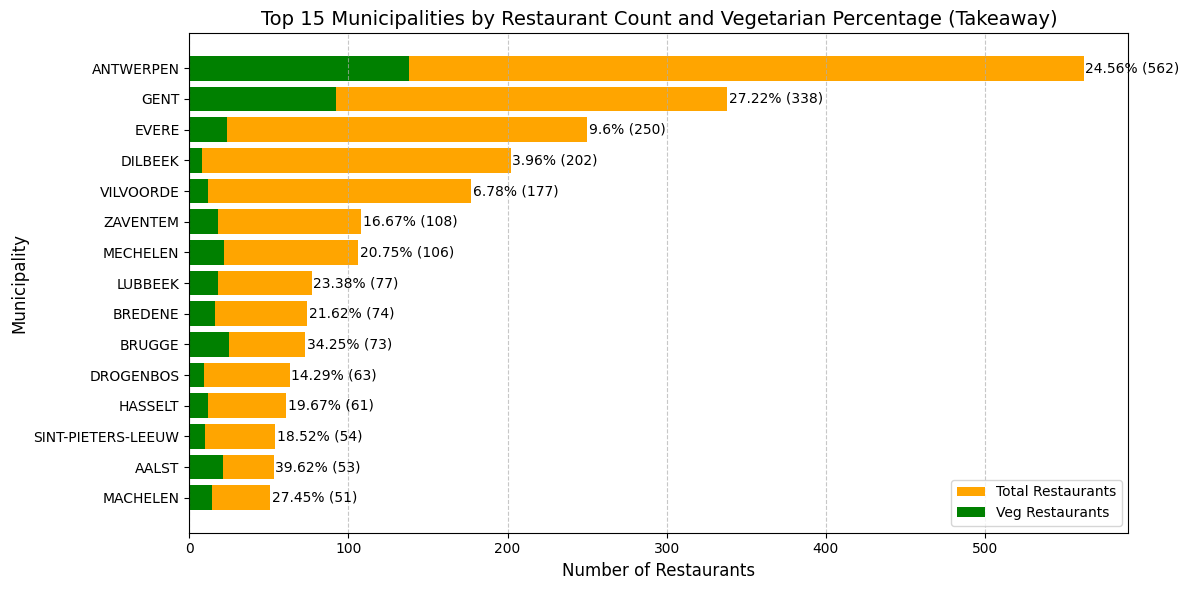

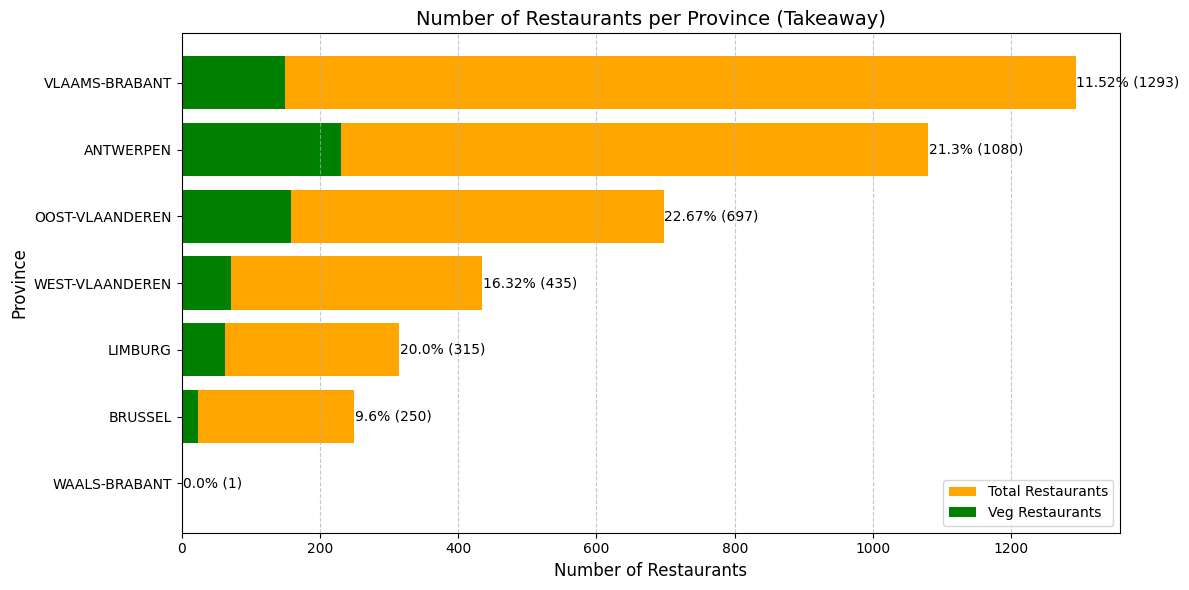

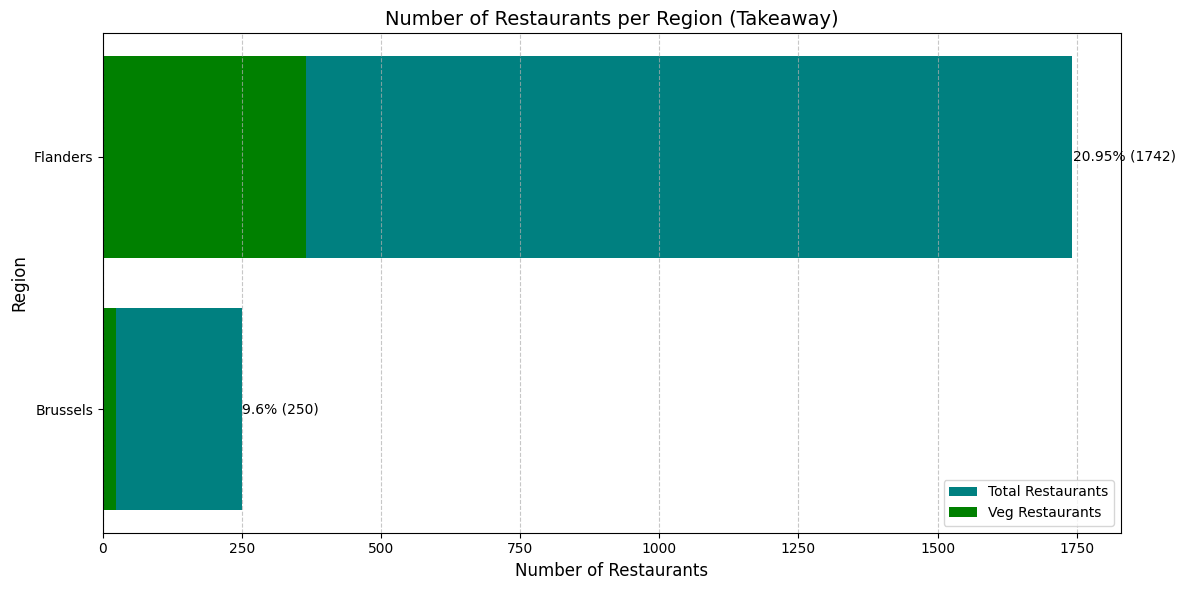

KeyError: 'restaurant_city'

In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"
dutch_postal_codes_file = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls"

# Count unique restaurants from the database
conn = sqlite3.connect(db_path)
restaurant_count_query = """
    SELECT 
    r.primarySlug AS slug_id,
    r.restaurant_id AS restaurant_id,
    l.postalCode AS postal_code,
    l.name AS location_name
FROM restaurants AS r
LEFT JOIN locations_to_restaurants AS lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations AS l ON lr.location_id = l.ID;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Query to extract vegetarian and vegan dishes with postal codes from the restaurant table for Takeaway
veg_dish_query = """
SELECT
    r.primarySlug AS slug_id,
    l.postalCode AS postal_code,
    r.restaurant_id AS restaurant_id,
    r.name AS restaurant_name,
    r.address AS restaurant_address,
    mi.name AS dish_name,
    mi.description,
    c.name AS category
FROM menuItems mi
JOIN categories c ON mi.id = c.item_id
JOIN restaurants r ON mi.primarySlug = r.primarySlug
LEFT JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations l ON lr.location_id = l.ID
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%';

"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)
conn.close()

# Remove duplicates to get the accurate count
unique_restaurants = restaurant_data.drop_duplicates(subset=['restaurant_id'])
total_restaurants = len(unique_restaurants)
duplicates_r = restaurant_data[restaurant_data.duplicated(subset=['restaurant_id'], keep=False)]
print(f"Restaurant Duplicate Files :{duplicates_r}")
duplicates_v = veg_dish_data[veg_dish_data.duplicated(subset=['restaurant_id', 'postal_code'], keep=False)]
print(f"Veg duplicates :{duplicates_v}")
valid_veg_test_dish_data = pd.merge(
    veg_dish_data,
    restaurant_data[['restaurant_id']],
    on='restaurant_id',
    how='inner'
)
print(valid_veg_test_dish_data)

print(f"Total number of unique restaurants: {total_restaurants}")

# Load the Dutch postal codes dataset
dutch_postal_codes_df = pd.read_excel(dutch_postal_codes_file)

# Normalize and clean postal codes
unique_restaurants['postal_code'] = unique_restaurants['postal_code'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')
veg_dish_data['postal_code'] = veg_dish_data['postal_code'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')

# Extract only numeric values from postal codes
unique_restaurants['postal_code'] = unique_restaurants['postal_code'].str.extract(r'(\d+)', expand=False)
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].str.extract(r'(\d+)', expand=False)
veg_dish_data['postal_code'] = veg_dish_data['postal_code'].str.extract(r'(\d+)', expand=False)

# Remap missing or '0' locations using the external CSV
remapped_restaurants_df = pd.merge(
    unique_restaurants,
    dutch_postal_codes_df[['Postcode', 'NAME', 'MAIN MUNICIPALITY', 'Provincie']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
)

# Deduplicate to ensure unique restaurant IDs
remapped_restaurants_df = remapped_restaurants_df.drop_duplicates(subset=['restaurant_id'])

# Replace missing or '0' location names
remapped_restaurants_df['location_name'] = remapped_restaurants_df['location_name'].fillna(remapped_restaurants_df['NAME'])
remapped_restaurants_df.drop(columns=['Postcode', 'NAME'], inplace=True)

# Final count of unique restaurants
final_restaurant_count = len(remapped_restaurants_df)
print(f"Final count of unique restaurants after remapping: {final_restaurant_count}")

# Group by municipality and count restaurants
restaurants_per_municipality = remapped_restaurants_df.groupby('MAIN MUNICIPALITY')['restaurant_id'].count().reset_index()
restaurants_per_municipality.columns = ['Municipality', 'Restaurant Count']

# Map vegetarian and vegan dishes to municipalities
veg_dishes_per_municipality = pd.merge(
    veg_dish_data,
    dutch_postal_codes_df[['Postcode', 'MAIN MUNICIPALITY']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
).groupby('MAIN MUNICIPALITY')['restaurant_id'].nunique().reset_index()
veg_dishes_per_municipality.columns = ['Municipality', 'Veg Restaurant Count']

# Combine municipality restaurant and vegetarian data
municipality_comparison_df = pd.merge(
    restaurants_per_municipality,
    veg_dishes_per_municipality,
    on='Municipality',
    how='left'
)
municipality_comparison_df['Veg Restaurant Count'] = municipality_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
municipality_comparison_df['Percentage Veg'] = (municipality_comparison_df['Veg Restaurant Count'] / municipality_comparison_df['Restaurant Count'] * 100).round(2)
municipality_comparison_df = municipality_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Print top municipalities with data
print("Top Municipalities with Vegetarian Data:")
print(municipality_comparison_df.head(15))

# Plot bar chart for top 15 municipalities
top_15_municipalities = municipality_comparison_df.head(15)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Restaurant Count'], color='orange', label='Total Restaurants')
plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for i, (bar, percentage, count) in enumerate(zip(bars, top_15_municipalities['Percentage Veg'], top_15_municipalities['Restaurant Count'])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}% ({count})', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 15 Municipalities by Restaurant Count and Vegetarian Percentage (Takeaway)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by province and count restaurants
restaurants_per_province = remapped_restaurants_df.groupby('Provincie')['restaurant_id'].count().reset_index()
restaurants_per_province.columns = ['Province', 'Restaurant Count']

# Map vegetarian and vegan dishes to provinces
veg_dishes_per_province = pd.merge(
    veg_dish_data,
    dutch_postal_codes_df[['Postcode', 'Provincie']],
    left_on='postal_code',
    right_on='Postcode',
    how='left'
).groupby('Provincie')['restaurant_id'].nunique().reset_index()
veg_dishes_per_province.columns = ['Province', 'Veg Restaurant Count']

# Combine province restaurant and vegetarian data
province_comparison_df = pd.merge(
    restaurants_per_province,
    veg_dishes_per_province,
    on='Province',
    how='left'
)
province_comparison_df['Veg Restaurant Count'] = province_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
province_comparison_df['Percentage Veg'] = (province_comparison_df['Veg Restaurant Count'] / province_comparison_df['Restaurant Count'] * 100).round(2)
province_comparison_df = province_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Plot bar chart for restaurants per province with vegetarian data
plt.figure(figsize=(12, 6))
bars = plt.barh(province_comparison_df['Province'], province_comparison_df['Restaurant Count'], color='orange', label='Total Restaurants')
plt.barh(province_comparison_df['Province'], province_comparison_df['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for i, (bar, percentage, count) in enumerate(zip(bars, province_comparison_df['Percentage Veg'], province_comparison_df['Restaurant Count'])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}% ({count})', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.title('Number of Restaurants per Province (Takeaway)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add regions based on postal codes (Flanders, Brussels, Wallonia)
def assign_region(postal_code):
    if pd.notnull(postal_code):
        postal_code = int(postal_code)
        if 1000 <= postal_code <= 1299:
            return 'Brussels'
        elif 1300 <= postal_code <= 1499 or 2000 <= postal_code <= 3999:
            return 'Flanders'
        elif 4000 <= postal_code <= 7999:
            return 'Wallonia'
    return None

remapped_restaurants_df['Region'] = remapped_restaurants_df['postal_code'].apply(assign_region)

# Group by region and count restaurants
restaurants_per_region = remapped_restaurants_df.groupby('Region')['restaurant_id'].count().reset_index()
restaurants_per_region.columns = ['Region', 'Restaurant Count']

# Map vegetarian and vegan dishes to regions
veg_dishes_per_region = pd.merge(
    veg_dish_data,
    remapped_restaurants_df[['postal_code', 'Region']],
    on='postal_code',
    how='left'
).groupby('Region')['restaurant_id'].nunique().reset_index()
veg_dishes_per_region.columns = ['Region', 'Veg Restaurant Count']

# Combine region restaurant and vegetarian data
region_comparison_df = pd.merge(
    restaurants_per_region,
    veg_dishes_per_region,
    on='Region',
    how='left'
)
region_comparison_df['Veg Restaurant Count'] = region_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
region_comparison_df['Percentage Veg'] = (region_comparison_df['Veg Restaurant Count'] / region_comparison_df['Restaurant Count'] * 100).round(2)
region_comparison_df = region_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Plot bar chart for restaurants per region with vegetarian data
plt.figure(figsize=(12, 6))
bars = plt.barh(region_comparison_df['Region'], region_comparison_df['Restaurant Count'], color='teal', label='Total Restaurants')
plt.barh(region_comparison_df['Region'], region_comparison_df['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for i, (bar, percentage, count) in enumerate(zip(bars, region_comparison_df['Percentage Veg'], region_comparison_df['Restaurant Count'])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}% ({count})', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Number of Restaurants per Region (Takeaway)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group vegetarian dishes into one row per restaurant
veg_dish_data_grouped = veg_dish_data.groupby(['restaurant_id', 'postal_code', 'restaurant_name', 'restaurant_address', 'restaurant_city']).agg({
    'dish_name': lambda x: ', '.join(x),
    'category': lambda x: ', '.join(x)
}).reset_index()

# Export vegetarian data to CSV
veg_dish_data_grouped.to_csv("takeaway_veg_dishes_grouped_by_restaurant.csv", index=False)
print("Vegetarian dish data grouped by restaurant exported to 'takeaway_veg_dishes_grouped_by_restaurant.csv'.")


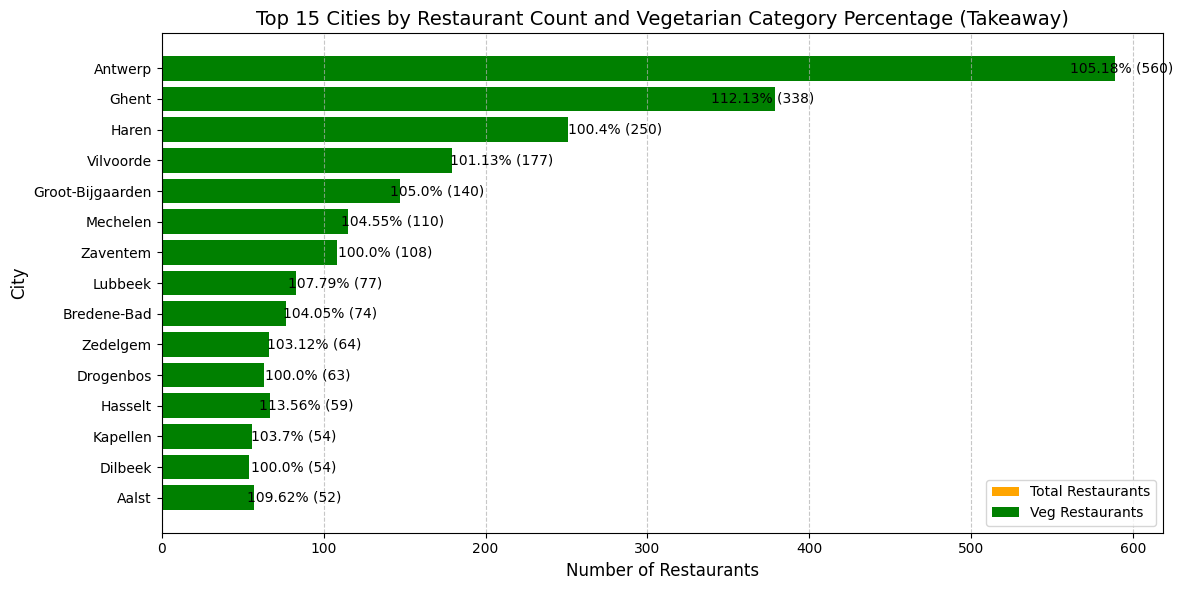

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File path for the database
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to extract restaurant data using primarySlug as restaurant name and city
restaurant_count_query = """
    SELECT 
    r.primarySlug AS restaurant_name,  -- Use primarySlug as the restaurant name
    r.restaurant_id AS restaurant_id,
    l.city AS city
FROM restaurants AS r
LEFT JOIN locations_to_restaurants AS lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations AS l ON lr.location_id = l.ID;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Refine the query to extract vegetarian and vegan categories (only those in selected categories)
veg_dish_query = """
SELECT
    r.primarySlug AS restaurant_name,  -- Use primarySlug as restaurant name
    r.restaurant_id AS restaurant_id,
    GROUP_CONCAT(DISTINCT c.name) AS categories,    -- Concatenate distinct categories
    l.city AS city                          -- Include city
FROM menuItems mi
JOIN categories c ON mi.id = c.item_id
JOIN restaurants r ON mi.primarySlug = r.primarySlug
LEFT JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations l ON lr.location_id = l.ID
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%'
GROUP BY r.restaurant_id;
"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)

# Close the connection to the database
conn.close()

# Merge restaurant data with vegetarian dish data
restaurant_veg_data = pd.merge(restaurant_data, veg_dish_data, on='restaurant_id', how='left')

# Drop 'restaurant_name_y' and 'city_y' columns, and rename 'restaurant_name_x' and 'city_x'
restaurant_veg_data = restaurant_veg_data.drop(columns=['restaurant_name_y', 'city_y'])
restaurant_veg_data = restaurant_veg_data.rename(columns={'restaurant_name_x': 'restaurant_name', 'city_x': 'city'})

# Clean and handle missing categories
restaurant_veg_data['categories'] = restaurant_veg_data['categories'].fillna('No Vegetarian Categories')

# Count the number of vegetarian categories available at each unique restaurant
restaurant_veg_data['veg_category_count'] = restaurant_veg_data['categories'].apply(lambda x: len(x.split(',')))

# Remove duplicates: each restaurant should only be counted once
restaurant_veg_data_unique = restaurant_veg_data.drop_duplicates(subset=['restaurant_id'])

# Group by city and count unique restaurants and vegetarian restaurants
city_comparison_df = restaurant_veg_data_unique.groupby('city').agg(
    Restaurant_Count=('restaurant_id', 'count'),  # Count unique restaurants
    Veg_Restaurant_Count=('veg_category_count', 'sum')  # Sum vegetarian categories for each restaurant
).reset_index()

# Calculate percentage of vegetarian restaurants
city_comparison_df['Percentage Veg'] = (city_comparison_df['Veg_Restaurant_Count'] / city_comparison_df['Restaurant_Count'] * 100).round(2)

# Sort by the total restaurant count and take top 15
top_15_cities = city_comparison_df.sort_values(by='Restaurant_Count', ascending=False).head(15)

# Plot bar chart for top 15 cities with total and vegetarian restaurant counts
plt.figure(figsize=(12, 6))

# Plot the total restaurant count
bars = plt.barh(top_15_cities['city'], 
                top_15_cities['Restaurant_Count'], 
                color='orange', label='Total Restaurants')

# Plot the vegetarian restaurant count
plt.barh(top_15_cities['city'], 
         top_15_cities['Veg_Restaurant_Count'], 
         color='green', label='Veg Restaurants')

# Annotate the bars with the percentage and count
for i, (bar, percentage, count) in enumerate(zip(bars, 
                                                 top_15_cities['Percentage Veg'], 
                                                 top_15_cities['Restaurant_Count'])):
    plt.text(bar.get_width() + 1, 
             bar.get_y() + bar.get_height() / 2, 
             f'{percentage}% ({count})', 
             va='center')

# Set chart labels and title
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 15 Cities by Restaurant Count and Vegetarian Category Percentage (Takeaway)', fontsize=14)
plt.legend()

# Invert the y-axis to display the highest count on top
plt.gca().invert_yaxis()

# Add gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Export the data to CSV
restaurant_veg_data_unique.to_csv('restaurants_with_veg_categories.csv', index=False)

print("CSV file 'restaurants_with_veg_categories.csv' has been exported.")


In [36]:
# Print the column names of the merged DataFrame
print("Columns in restaurant_veg_data:", restaurant_veg_data.columns)


Columns in restaurant_veg_data: Index(['restaurant_name', 'restaurant_id', 'city', 'categories',
       'veg_category_count'],
      dtype='object')


In [5]:
import sqlite3
import pandas as pd

# Connect to the database
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"
conn = sqlite3.connect(db_path)

# Query to find duplicate restaurant entries in Lubbeek
restaurant_duplicates_query = """
SELECT r.primarySlug, COUNT(*)
FROM restaurants r
JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
JOIN locations l ON lr.location_id = l.ID
WHERE l.name = 'Lubbeek'
GROUP BY r.primarySlug
HAVING COUNT(*) > 1;
"""

# Execute the query and fetch results
restaurant_duplicates = pd.read_sql_query(restaurant_duplicates_query, conn)

# Print the result
print("Restaurant Duplicates in Lubbeek:")
print(restaurant_duplicates)

# Close the connection
conn.close()


Restaurant Duplicates in Lubbeek:
Empty DataFrame
Columns: [primarySlug, COUNT(*)]
Index: []


In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File path for the database
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to extract restaurant data using primarySlug as restaurant name and city
restaurant_count_query = """
    SELECT 
    r.primarySlug AS restaurant_name,  -- Use primarySlug as the restaurant name
    r.restaurant_id AS restaurant_id,
    l.city AS city,
    l.postalCode AS postal_code  -- Ensure postal code is included
FROM restaurants AS r
LEFT JOIN locations_to_restaurants AS lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations AS l ON lr.location_id = l.ID;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Refine the query to extract vegetarian and vegan categories (only those in selected categories)
veg_dish_query = """
SELECT
    r.primarySlug AS restaurant_name,  -- Use primarySlug as restaurant name
    r.restaurant_id AS restaurant_id,
    GROUP_CONCAT(DISTINCT c.name) AS categories,    -- Concatenate distinct categories
    l.city AS city,                          -- Include city
    l.postalCode AS postal_code  -- Include postal code
FROM menuItems mi
JOIN categories c ON mi.id = c.item_id
JOIN restaurants r ON mi.primarySlug = r.primarySlug
LEFT JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations l ON lr.location_id = l.ID
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%'
GROUP BY r.restaurant_id;
"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)

# Close the connection to the database
conn.close()

# Merge restaurant data with vegetarian dish data
restaurant_veg_data = pd.merge(restaurant_data, veg_dish_data, on='restaurant_id', how='left')

# Drop 'restaurant_name_y' and 'city_y' columns, and rename 'restaurant_name_x' and 'city_x'
restaurant_veg_data = restaurant_veg_data.drop(columns=['restaurant_name_y', 'city_y'])
restaurant_veg_data = restaurant_veg_data.rename(columns={'restaurant_name_x': 'restaurant_name', 'city_x': 'city'})

# Clean and handle missing categories
restaurant_veg_data['categories'] = restaurant_veg_data['categories'].fillna('No Vegetarian Categories')

# Count the number of vegetarian categories available at each unique restaurant
restaurant_veg_data['veg_category_count'] = restaurant_veg_data['categories'].apply(lambda x: len(x.split(',')))

# Remove duplicates: each restaurant should only be counted once
restaurant_veg_data_unique = restaurant_veg_data.drop_duplicates(subset=['restaurant_id'])

# Function to assign region based on postal code
def assign_region(postal_code):
    if pd.notnull(postal_code):
        postal_code = str(postal_code)
        if postal_code.startswith('1') or postal_code.startswith('2'):
            return 'Flanders'
        elif postal_code.startswith('10'):
            return 'Brussels'
        else:
            return 'Wallonia'
    return 'Unknown'  # Return 'Unknown' if no region can be assigned

# Check if postal_code is missing in restaurant_veg_data_unique, then fill
if 'postal_code' not in restaurant_veg_data_unique.columns:
    print("postal_code column is missing.")
else:
    # Add region column to the data
    restaurant_veg_data_unique['region'] = restaurant_veg_data_unique['postal_code'].apply(assign_region)

# Check if region column is created successfully
print(restaurant_veg_data_unique[['restaurant_id', 'city', 'postal_code', 'region']].head())

# Group by region and count unique restaurants and vegetarian restaurants
region_comparison_df = restaurant_veg_data_unique.groupby('region').agg(
    Restaurant_Count=('restaurant_id', 'count'),  # Count unique restaurants
    Veg_Restaurant_Count=('veg_category_count', 'sum')  # Sum vegetarian categories for each restaurant
).reset_index()

# Calculate percentage of vegetarian restaurants
region_comparison_df['Percentage Veg'] = (region_comparison_df['Veg_Restaurant_Count'] / region_comparison_df['Restaurant_Count'] * 100).round(2)

# Plot bar chart for restaurants per region with vegetarian data
plt.figure(figsize=(12, 6))

# Plot the total restaurant count
bars = plt.barh(region_comparison_df['region'], 
                region_comparison_df['Restaurant_Count'], 
                color='orange', label='Total Restaurants')

# Plot the vegetarian restaurant count
plt.barh(region_comparison_df['region'], 
         region_comparison_df['Veg_Restaurant_Count'], 
         color='green', label='Veg Restaurants')

# Annotate the bars with the percentage and count
for i, (bar, percentage, count) in enumerate(zip(bars, 
                                                 region_comparison_df['Percentage Veg'], 
                                                 region_comparison_df['Restaurant_Count'])):
    plt.text(bar.get_width() + 1, 
             bar.get_y() + bar.get_height() / 2, 
             f'{percentage}% ({count})', 
             va='center')

# Set chart labels and title
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Restaurants with Vegetarian Categories per Region', fontsize=14)
plt.legend()

# Invert the y-axis to display the highest count on top
plt.gca().invert_yaxis()

# Add gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Export the data to CSV
restaurant_veg_data_unique.to_csv('restaurants_with_veg_categories_per_region.csv', index=False)

print("CSV file 'restaurants_with_veg_categories_per_region.csv' has been exported.")


postal_code column is missing.


KeyError: "['postal_code', 'region'] not in index"

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_21412/453951210.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_veg_data_unique['city'] = restaurant_veg_data_unique['city'].str.strip().str.lower()
/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_21412/453951210.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


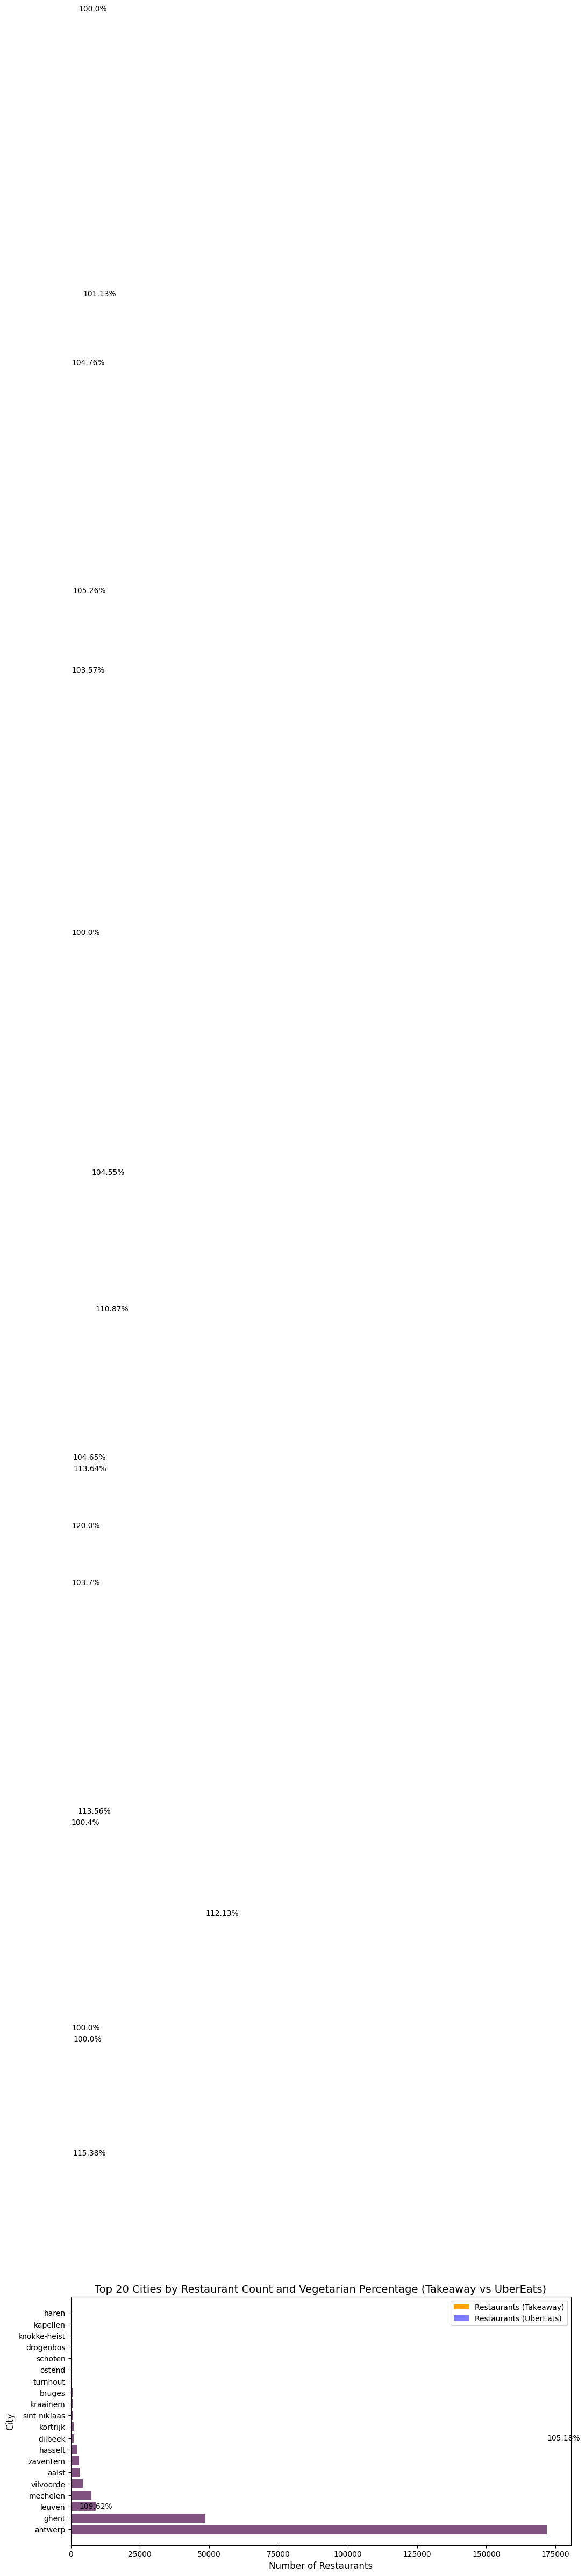

CSV file 'restaurants_comparison_top_20_takeaway_ubereats.csv' has been saved.


In [47]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

# Load your original database data (Takeaway)
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"
conn = sqlite3.connect(db_path)

# Query to extract restaurant data using primarySlug as restaurant name and city
restaurant_count_query = """
    SELECT 
    r.primarySlug AS restaurant_name,  -- Use primarySlug as the restaurant name
    r.restaurant_id AS restaurant_id,
    l.city AS city
FROM restaurants AS r
LEFT JOIN locations_to_restaurants AS lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations AS l ON lr.location_id = l.ID;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Refine the query to extract vegetarian and vegan categories (only those in selected categories)
veg_dish_query = """
SELECT
    r.primarySlug AS restaurant_name,  -- Use primarySlug as restaurant name
    r.restaurant_id AS restaurant_id,
    GROUP_CONCAT(DISTINCT c.name) AS categories,    -- Concatenate distinct categories
    l.city AS city                          -- Include city
FROM menuItems mi
JOIN categories c ON mi.id = c.item_id
JOIN restaurants r ON mi.primarySlug = r.primarySlug
LEFT JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations l ON lr.location_id = l.ID
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%'
GROUP BY r.restaurant_id;
"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)

# Close the connection to the database
conn.close()

# Merge restaurant data with vegetarian dish data
restaurant_veg_data = pd.merge(restaurant_data, veg_dish_data, on='restaurant_id', how='left')

# Drop 'restaurant_name_y' and 'city_y' columns, and rename 'restaurant_name_x' and 'city_x'
restaurant_veg_data = restaurant_veg_data.drop(columns=['restaurant_name_y', 'city_y'])
restaurant_veg_data = restaurant_veg_data.rename(columns={'restaurant_name_x': 'restaurant_name', 'city_x': 'city'})

# Clean and handle missing categories
restaurant_veg_data['categories'] = restaurant_veg_data['categories'].fillna('No Vegetarian Categories')

# Count the number of vegetarian categories available at each unique restaurant
restaurant_veg_data['veg_category_count'] = restaurant_veg_data['categories'].apply(lambda x: len(x.split(',')))

# Remove duplicates: each restaurant should only be counted once
restaurant_veg_data_unique = restaurant_veg_data.drop_duplicates(subset=['restaurant_id'])

# Load UberEats data (already executed in your original script)
uber_db_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/ubereats.db'
csv_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls'

# Connect to the UberEats database
conn = sqlite3.connect(uber_db_path)

# Query to extract UberEats restaurant data (already executed in your original script)
uber_restaurant_query = """
    SELECT 
        location__city AS city,
        id AS restaurant_id,
        location__address AS address,
        location__postal_code AS postal_code
    FROM restaurants;
"""
uber_restaurant_data = pd.read_sql_query(uber_restaurant_query, conn)

# Close the connection
conn.close()

# Normalize city names for matching
restaurant_veg_data_unique['city'] = restaurant_veg_data_unique['city'].str.strip().str.lower()
uber_restaurant_data['city'] = uber_restaurant_data['city'].str.strip().str.lower()

# Merge the datasets on city
merged_data = pd.merge(restaurant_veg_data_unique, uber_restaurant_data, on='city', how='left')

# Group by city to get restaurant counts for both datasets
city_comparison_df = merged_data.groupby('city').agg(
    Restaurant_Count=('restaurant_id_x', 'count'),  # Count unique restaurants (Takeaway)
    UberEats_Restaurant_Count=('restaurant_id_y', 'count'),  # Count unique restaurants (UberEats)
    Veg_Restaurant_Count=('veg_category_count', 'sum')  # Sum vegetarian categories for each restaurant
).reset_index()

# Calculate percentage of vegetarian restaurants
city_comparison_df['Percentage Veg'] = (city_comparison_df['Veg_Restaurant_Count'] / city_comparison_df['Restaurant_Count'] * 100).round(2)

# Sort by restaurant count and take top 20 cities
top_20_cities = city_comparison_df.sort_values(by='Restaurant_Count', ascending=False).head(20)

# Plot bar chart for top 20 cities with total and vegetarian restaurant counts
plt.figure(figsize=(12, 6))

# Plot the total restaurant count (Takeaway)
plt.barh(top_20_cities['city'], 
         top_20_cities['Restaurant_Count'], 
         color='orange', label='Restaurants (Takeaway)')

# Plot the UberEats restaurant count
plt.barh(top_20_cities['city'], 
         top_20_cities['UberEats_Restaurant_Count'], 
         color='blue', alpha=0.5, label='Restaurants (UberEats)')

# Annotate with percentages
for i, row in top_20_cities.iterrows():
    plt.text(row['Restaurant_Count'] + 10, i, f"{row['Percentage Veg']}%", va='center', fontsize=10)

# Set labels and title
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 20 Cities by Restaurant Count and Vegetarian Percentage (Takeaway vs UberEats)', fontsize=14)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Save the comparison data to a new CSV
top_20_cities.to_csv("restaurants_comparison_top_20_takeaway_ubereats.csv", index=False)
print("CSV file 'restaurants_comparison_top_20_takeaway_ubereats.csv' has been saved.")


In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"
dutch_postal_codes_file = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/CSV/FROM IMAD/zipcodes_num_nl_new_Tumi.xls"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to extract unique restaurants (we will group by restaurant_id)
restaurant_count_query = """
SELECT 
    r.primarySlug AS slug_id,
    r.restaurant_id AS restaurant_id,
    l.postalCode AS postal_code,
    l.name AS location_name
FROM restaurants AS r
LEFT JOIN locations_to_restaurants AS lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations AS l ON lr.location_id = l.ID;
"""
restaurant_data = pd.read_sql_query(restaurant_count_query, conn)

# Query to extract menu items and categories, grouped by restaurant_id
veg_dish_query = """
SELECT
    r.restaurant_id AS restaurant_id,
    GROUP_CONCAT(DISTINCT mi.name) AS dish_names,  -- Concatenate distinct dish names
    GROUP_CONCAT(DISTINCT c.name) AS categories    -- Concatenate distinct categories
FROM menuItems mi
JOIN categories c ON mi.id = c.item_id
JOIN restaurants r ON mi.primarySlug = r.primarySlug
LEFT JOIN locations_to_restaurants lr ON r.primarySlug = lr.restaurant_id
LEFT JOIN locations l ON lr.location_id = l.ID
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%'
GROUP BY r.restaurant_id;
"""
veg_dish_data = pd.read_sql_query(veg_dish_query, conn)

# Close the connection
conn.close()

# Normalize and clean postal codes
restaurant_data['postalCode'] = restaurant_data['postalCode'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')
dutch_postal_codes_df = pd.read_excel(dutch_postal_codes_file)
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')
veg_dish_data['postalCode'] = veg_dish_data['postal_code'].apply(lambda x: str(x).strip() if pd.notnull(x) else '')

# Extract only numeric values from postal codes
restaurant_data['postalCode'] = restaurant_data['postal_code'].str.extract(r'(\d+)', expand=False)
dutch_postal_codes_df['Postcode'] = dutch_postal_codes_df['Postcode'].str.extract(r'(\d+)', expand=False)
veg_dish_data['postalCode'] = veg_dish_data['postal_code'].str.extract(r'(\d+)', expand=False)

# Remap missing or '0' locations using the external CSV
remapped_restaurants_df = pd.merge(
    restaurant_data,
    dutch_postal_codes_df[['Postcode', 'NAME', 'MAIN MUNICIPALITY', 'Provincie']],
    left_on='postalCode',
    right_on='Postcode',
    how='left'
)

# Deduplicate to ensure unique restaurant IDs
remapped_restaurants_df = remapped_restaurants_df.drop_duplicates(subset=['restaurant_id'])

# Replace missing or '0' location names
remapped_restaurants_df['location_name'] = remapped_restaurants_df['location_name'].fillna(remapped_restaurants_df['NAME'])
remapped_restaurants_df.drop(columns=['Postcode', 'NAME'], inplace=True)

# Group by municipality and count restaurants
restaurants_per_municipality = remapped_restaurants_df.groupby('MAIN MUNICIPALITY')['restaurant_id'].count().reset_index()
restaurants_per_municipality.columns = ['Municipality', 'Restaurant Count']

# Map vegetarian and vegan dishes to municipalities (now grouped by restaurant)
veg_dishes_per_municipality = pd.merge(
    veg_dish_data,
    dutch_postal_codes_df[['Postcode', 'MAIN MUNICIPALITY']],
    left_on='postalCode',
    right_on='Postcode',
    how='left'
).groupby('MAIN MUNICIPALITY')['restaurant_id'].nunique().reset_index()
veg_dishes_per_municipality.columns = ['Municipality', 'Veg Restaurant Count']

# Combine municipality restaurant and vegetarian data
municipality_comparison_df = pd.merge(
    restaurants_per_municipality,
    veg_dishes_per_municipality,
    on='Municipality',
    how='left'
)
municipality_comparison_df['Veg Restaurant Count'] = municipality_comparison_df['Veg Restaurant Count'].fillna(0).astype(int)
municipality_comparison_df['Percentage Veg'] = (municipality_comparison_df['Veg Restaurant Count'] / municipality_comparison_df['Restaurant Count'] * 100).round(2)
municipality_comparison_df = municipality_comparison_df.sort_values(by='Restaurant Count', ascending=False)

# Print top municipalities with data
print("Top Municipalities with Vegetarian Data:")
print(municipality_comparison_df.head(15))

# Plot bar chart for top 15 municipalities
top_15_municipalities = municipality_comparison_df.head(15)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Restaurant Count'], color='orange', label='Total Restaurants')
plt.barh(top_15_municipalities['Municipality'], top_15_municipalities['Veg Restaurant Count'], color='green', label='Veg Restaurants')
for i, (bar, percentage, count) in enumerate(zip(bars, top_15_municipalities['Percentage Veg'], top_15_municipalities['Restaurant Count'])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}% ({count})', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.title('Top 15 Municipalities by Restaurant Count and Vegetarian Percentage (Takeaway)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: 'postalCode'

Top Cities by Percentage of Vegetarian and Vegan Restaurants:
                   city  total_restaurant_count  veg_restaurant_count  \
458          Herenthals                       1                     1   
394         Ossendrecht                       1                     1   
436                Kiel                       1                     1   
447      Houthalen-Oost                       1                     1   
448  Hoogstraten-Meerle                       1                     1   
431     Kortrijk-Dutsel                       1                     1   
520           Assebroek                       1                     1   
467   Halle-Booienhoven                       1                     1   
420              Loppem                       1                     1   
516           Baardegem                       1                     1   
410          Neerlinter                       1                     1   
468               Halen                       1               

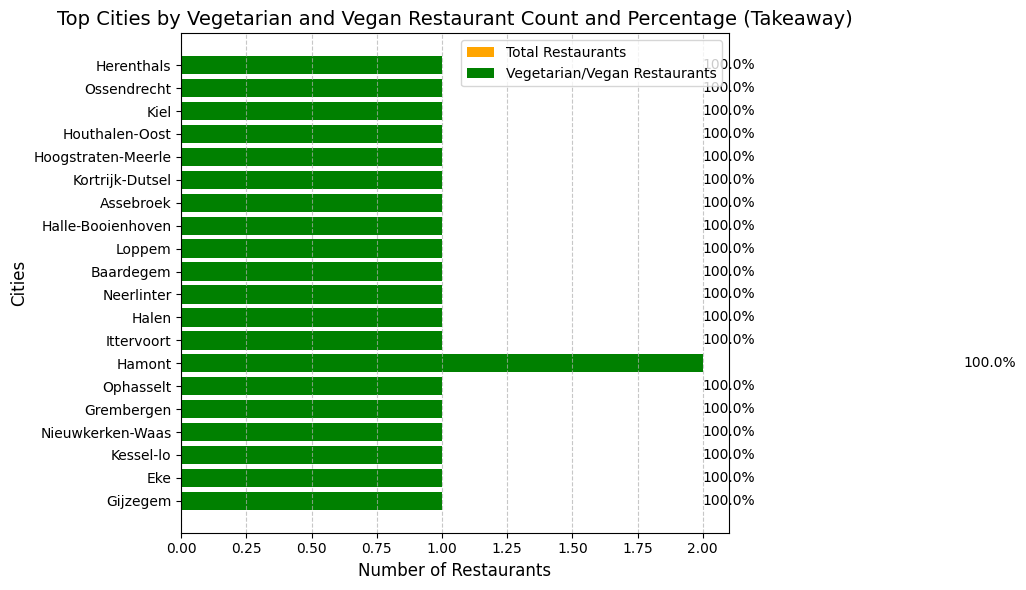

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# File paths
db_path = "/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db"

# Query to extract count of vegetarian and vegan restaurants in each city
veg_city_query = """
SELECT 
    r.name AS restaurant_name,
    r.restaurant_id AS restaurant_id,
    r.city AS city,
    COUNT(DISTINCT r.primarySlug) AS veg_restaurant_count
FROM restaurants AS r
JOIN menuItems mi ON r.primarySlug = mi.primarySlug
JOIN categories c ON mi.id = c.item_id
WHERE c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%' OR c.name LIKE '%veg%'
GROUP BY r.city
ORDER BY veg_restaurant_count DESC;
"""

# Query to extract total count of restaurants in each city
total_city_query = """
SELECT 
    r.city AS city,
    COUNT(DISTINCT r.primarySlug) AS total_restaurant_count
FROM restaurants AS r
GROUP BY r.city
ORDER BY total_restaurant_count DESC;
"""

# Connect to the database and execute the queries
conn = sqlite3.connect(db_path)
veg_city_cursor = conn.execute(veg_city_query)
veg_city_results = veg_city_cursor.fetchall()

total_city_cursor = conn.execute(total_city_query)
total_city_results = total_city_cursor.fetchall()
conn.close()

# Convert results to DataFrames
veg_city_df = pd.DataFrame(veg_city_results, columns=['city', 'veg_restaurant_count'])
total_city_df = pd.DataFrame(total_city_results, columns=['city', 'total_restaurant_count'])

# Merge the two DataFrames to calculate percentages
city_comparison_df = pd.merge(total_city_df, veg_city_df, on='city', how='left')
city_comparison_df['veg_restaurant_count'] = city_comparison_df['veg_restaurant_count'].fillna(0).astype(int)
city_comparison_df['percentage_veg'] = (
    city_comparison_df['veg_restaurant_count'] / city_comparison_df['total_restaurant_count'] * 100
).round(2)

# Sort by percentage of vegetarian restaurants
top_cities = city_comparison_df.sort_values(by='percentage_veg', ascending=False).head(20)

# Print the results
print("Top Cities by Percentage of Vegetarian and Vegan Restaurants:")
print(top_cities[['city', 'total_restaurant_count', 'veg_restaurant_count', 'percentage_veg']])

# Preprocess data for the chart
cities = top_cities['city']
total_counts = top_cities['total_restaurant_count']
veg_counts = top_cities['veg_restaurant_count']
percentages = top_cities['percentage_veg']

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(cities, total_counts, color='orange', label='Total Restaurants')
plt.barh(cities, veg_counts, color='green', label='Vegetarian/Vegan Restaurants')
for i, (bar, percentage) in enumerate(zip(bars, percentages)):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{percentage}%', va='center')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cities', fontsize=12)
plt.title('Top Cities by Vegetarian and Vegan Restaurant Count and Percentage (Takeaway)', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


Zipcodes Data Columns:
['Postcode', 'NAME', 'SUBMUNICIPALITY', 'MAIN MUNICIPALITY', 'Provincie']
Data after merge:
   postalcode MAIN MUNICIPALITY
0        3000            LEUVEN
1        2060         ANTWERPEN
6        2000         ANTWERPEN
8        9000              GENT
13       1140             EVERE
Municipality Summary:
platform           Deliveroo
MAIN MUNICIPALITY           
AALST                     11
ANTWERPEN                393
BRUGGE                   438
BRUSSEL                   24
EVERE                      3


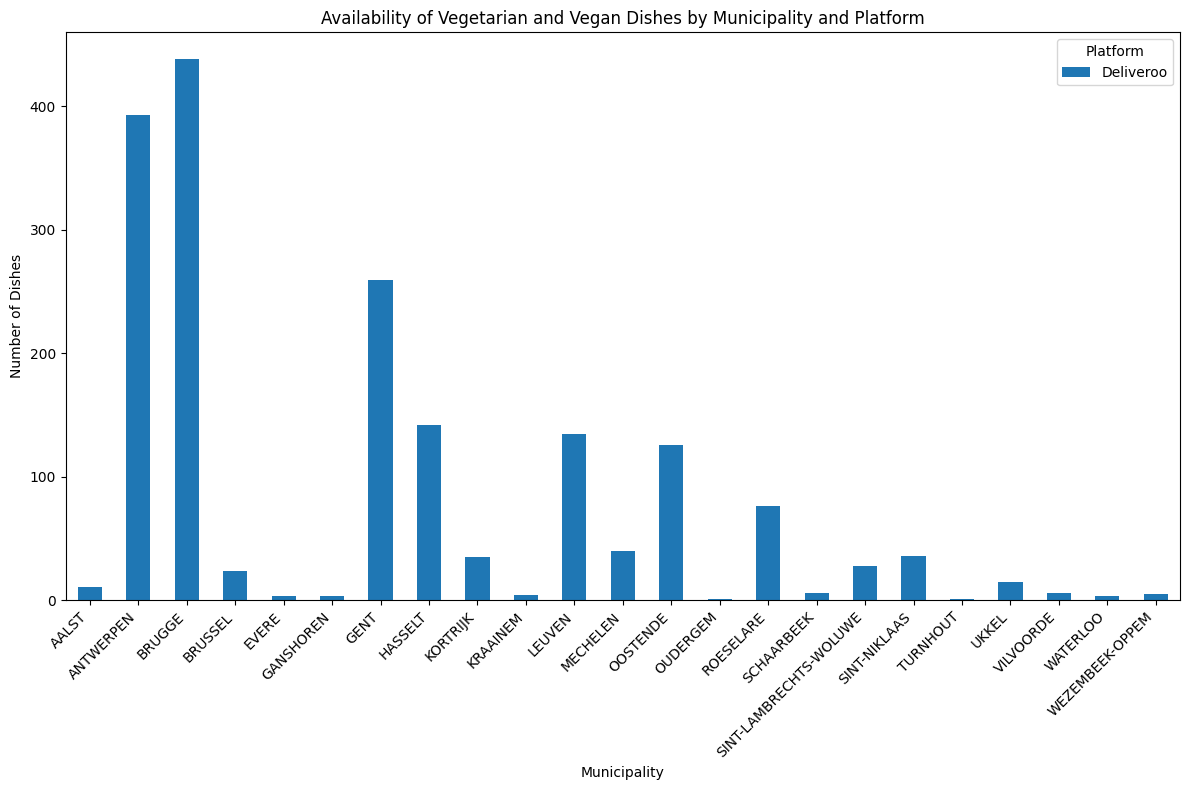

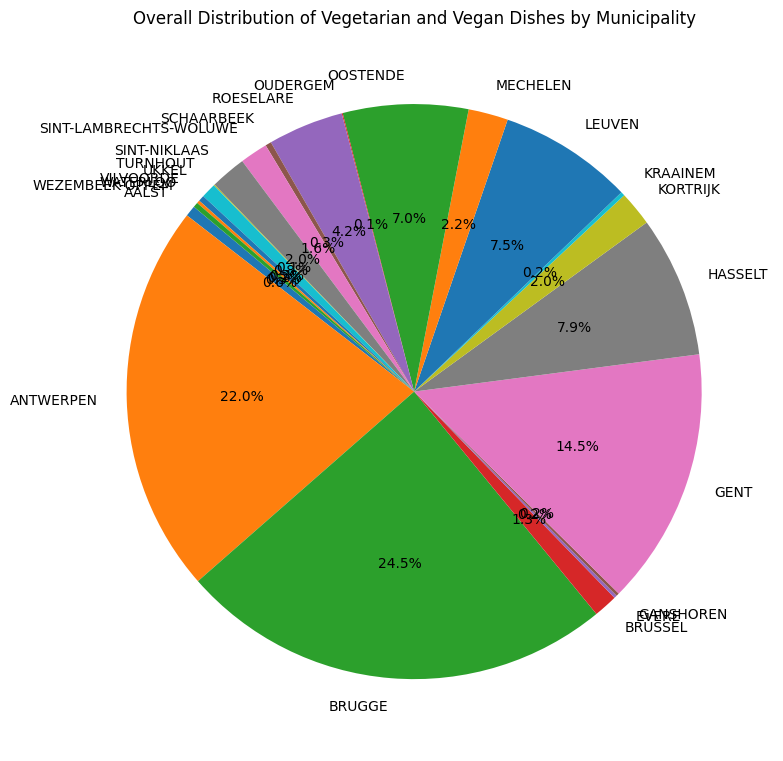

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Database paths
deliveroo_db_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/deliveroo.db'
takeaway_db_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/takeaway.db'
ubereats_db_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/databases/ubereats.db'
zipcodes_file_path = '/Users/irisvirus/Desktop/Becode/Python/Projects/Food_delivery_analysis/delivery-market-analysis/zipcodes_num_nl_new_Tumi.csv'

# Helper function to query data from a database
def query_database(db_path, query):
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Query to extract vegetarian and vegan dishes with location details for Deliveroo
deliveroo_query = """
SELECT
    r.postal_code AS postalcode,
    mi.name AS dish_name,
    mi.description,
    c.name AS category
FROM
    menu_items mi
JOIN
    categories c ON mi.categorie_id = c.categorie_id
JOIN
    restaurants r ON mi.restaurant_id = r.id
WHERE
    c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%';
"""
deliveroo_data = query_database(deliveroo_db_path, deliveroo_query)

# Query to extract vegetarian and vegan dishes with location details for Takeaway
takeaway_query = """
SELECT
    l.name AS location_name,
    l.city,
    mi.name AS dish_name,
    mi.description,
    c.name AS category
FROM
    menuItems mi
JOIN
    categories c ON mi.id = c.item_id
JOIN
    locations_to_restaurants ltr ON mi.primarySlug = ltr.restaurant_id
JOIN
    locations l ON ltr.location_id = l.ID
WHERE
    c.name LIKE '%vegetarian%' OR c.name LIKE '%vegan%';
"""
takeaway_data = query_database(takeaway_db_path, takeaway_query)

# Query to extract vegetarian and vegan dishes with location details for UberEats
ubereats_query = """
SELECT
    l.region AS location_region,
    mi.name AS dish_name,
    mi.description,
    rtc.category
FROM
    menu_items mi
JOIN
    restaurant_to_categories rtc ON mi.restaurant_id = rtc.restaurant_id
JOIN
    locations_to_restaurants ltr ON mi.restaurant_id = ltr.restaurant_id
JOIN
    locations l ON ltr.location_id = l.id
WHERE
    rtc.category LIKE '%vegetarian%' OR rtc.category LIKE '%vegan%';
"""
ubereats_data = query_database(ubereats_db_path, ubereats_query)

# Combine the data from all platforms
data = pd.concat([
    deliveroo_data.assign(platform="Deliveroo"),
    takeaway_data.assign(platform="Takeaway"),
    ubereats_data.assign(platform="UberEats")
], ignore_index=True)

# Load the municipality data from the uploaded CSV file
zipcodes_data = pd.read_csv(zipcodes_file_path, delimiter=';')

# Debug: Display the column names in the zipcodes_data DataFrame
print("Zipcodes Data Columns:")
print(zipcodes_data.columns.tolist())

# Normalize postal codes to ensure consistency
data['postalcode'] = data['postalcode'].apply(lambda x: x.decode('utf-8').strip().zfill(4) if isinstance(x, bytes) else str(x).strip().zfill(4))
zipcodes_data['Postcode'] = zipcodes_data['Postcode'].astype(str).str.strip().str.zfill(4)


# Extract the municipality name based on postal codes and match to dishes data
data = data.merge(zipcodes_data[['Postcode', 'MAIN MUNICIPALITY']],
                  left_on='postalcode', right_on='Postcode', how='left')

# Debug: Check if MAIN MUNICIPALITY column is populated
print("Data after merge:")
print(data[['postalcode', 'MAIN MUNICIPALITY']].drop_duplicates().head())

# Filter out rows where MAIN MUNICIPALITY is missing
data = data.dropna(subset=['MAIN MUNICIPALITY'])

# Analyze the availability of vegetarian and vegan dishes by municipality
municipality_summary = data.groupby(['MAIN MUNICIPALITY', 'platform']).size().unstack(fill_value=0)

# Debug: Check municipality_summary DataFrame
print("Municipality Summary:")
print(municipality_summary.head())

# Bar chart of vegan and vegetarian dishes by municipality
if not municipality_summary.empty:
    municipality_summary.plot(kind='bar', figsize=(12, 8))
    plt.title('Availability of Vegetarian and Vegan Dishes by Municipality and Platform')
    plt.xlabel('Municipality')
    plt.ylabel('Number of Dishes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Platform')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for bar chart.")

# Pie chart showing overall distribution by municipality
municipality_totals = municipality_summary.sum(axis=1)
if not municipality_totals.empty:
    plt.figure(figsize=(8, 8))
    municipality_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Overall Distribution of Vegetarian and Vegan Dishes by Municipality')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for pie chart.")